In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import *
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df=pd.read_csv("Walmart.csv")

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df["Year"] = df["Date"].str[-4:]
df["Month"] = df["Date"].str[3:5]
df["Day"] = df["Date"].str[0:2]

In [5]:
df["date"]=pd.to_datetime(df["Year"].astype(str)+"--"+df["Month"].astype(str)+"--"+df["Day"])

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05,2010-03-05


In [7]:
df["date"].unique()

array(['2010-02-05T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-03-05T00:00:00.000000000', '2010-03-12T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-04-02T00:00:00.000000000', '2010-04-09T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13

# Forecasting For Store No-1 (as Trial)

In [8]:
dl=df[df["Store"]==1]

In [9]:
dl

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05,2010-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908,2012,09,28,2012-09-28
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10,05,2012-10-05
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10,12,2012-10-12
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,19,2012-10-19


In [10]:
dl=dl[["date","Weekly_Sales"]]

In [11]:
dl

,date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [12]:
dl=dl.set_index(dl['date'])

In [13]:
dl

,date,Weekly_Sales
date,,
2010-02-05,2010-02-05,1643690.90
2010-02-12,2010-02-12,1641957.44
2010-02-19,2010-02-19,1611968.17
2010-02-26,2010-02-26,1409727.59
2010-03-05,2010-03-05,1554806.68
...,...,...
2012-09-28,2012-09-28,1437059.26
2012-10-05,2012-10-05,1670785.97
2012-10-12,2012-10-12,1573072.81


In [14]:
dl.drop("date", axis=1, inplace=True)

In [16]:
dl

,Weekly_Sales
date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [15]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


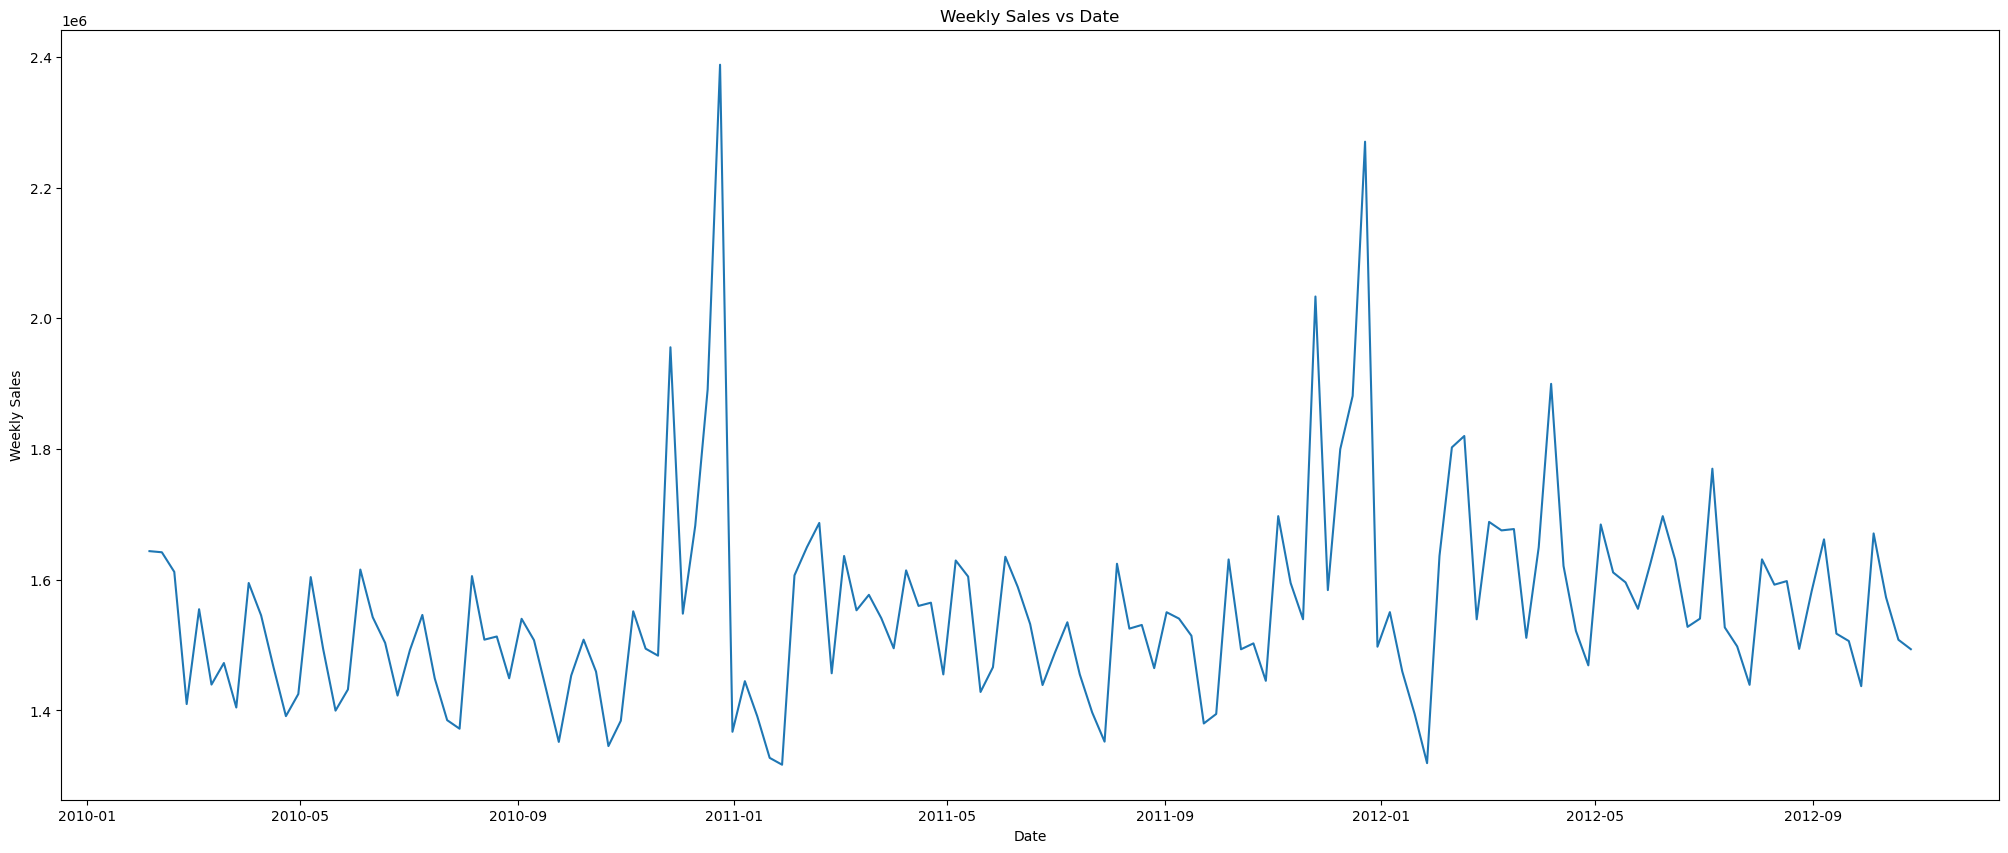

In [16]:
plt.figure(figsize=(25,10))
plt.plot(dl)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales vs Date")
plt.show()

# Augmented Dicky Fuller Test 
# Motive of the test to know the data is static or not with the help of two hypothesis 
# Null hypothesis(h0)- the data is not static
# Alternative hypothesis(h1)-the data is static
# if p val < 0.05 reject null
# if p val > 0.05 fail to reject the null 
# here the p mValue signifies the propability values which suggests that the observed results are unlikely to have occurred by random chance 

In [17]:
from statsmodels.tsa.stattools import adfuller


In [18]:
def adf_test(series):
    result=adfuller(series)
    pval = result[1]
    print(pval)
    
    if pval < 0.05:
        print("The Data is Static")
    else:
        print("The Data is Not Static")

In [19]:
adf_test(dl["Weekly_Sales"])

1.3877788330759535e-05
The Data is Static


In [20]:
mean_log=dl.rolling(window=7).mean()
std_log=dl.rolling(window=7).std()

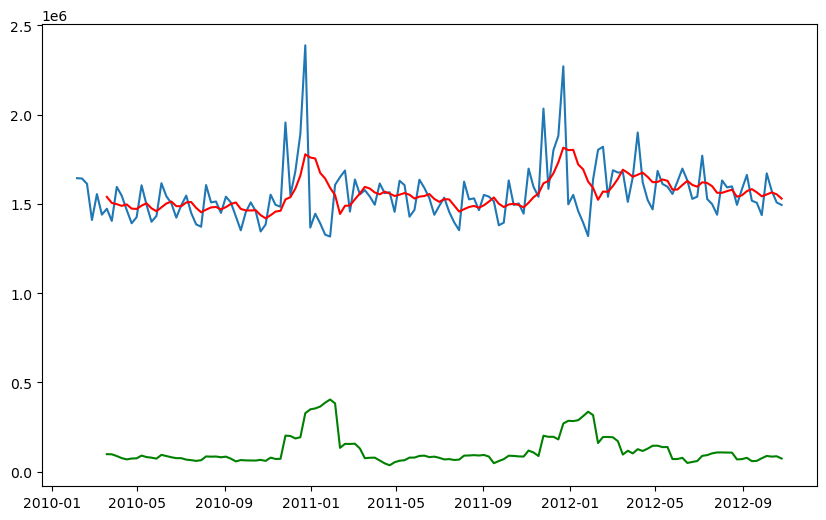

In [21]:
plt.figure(figsize=(10,6))
plt.plot(dl)
plt.plot(mean_log,linestyle="-",color="red")
plt.plot(std_log,linestyle="-",color="green")

# Model Building 

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

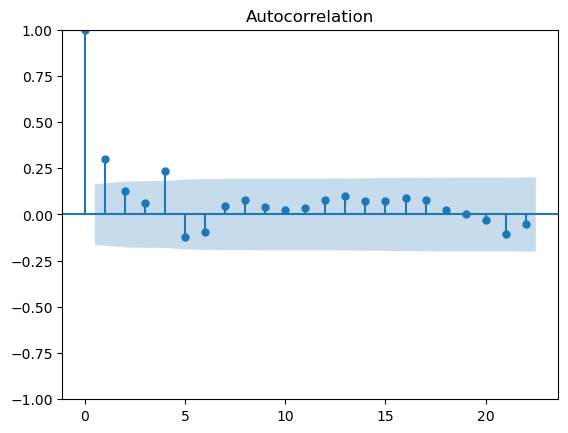

In [23]:

acf=plot_acf(dl["Weekly_Sales"])

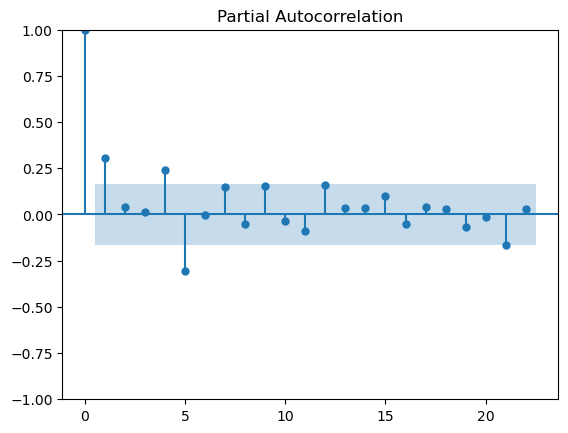

In [26]:
pacf=plot_pacf(dl["Weekly_Sales"])

In [27]:
train_size = int(0.8 * len(dl["Weekly_Sales"]))
train_data =dl["Weekly_Sales"][:train_size]
test_data = dl["Weekly_Sales"][train_size:]

In [28]:
!pip install pmdarima

In [32]:
from pmdarima.arima import auto_arima

In [33]:
model = auto_arima(dl["Weekly_Sales"], seasonal=True, stepwise=True)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Sat, 28 Oct 2023   AIC                           3807.686
Time:                        13:15:35   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+37. Standard errors may be unstable.
"""

In [36]:
model_fit=model.fit(dl["Weekly_Sales"])

In [58]:
# Generate forecast
forecast, conf_int = model.predict(n_periods=29, return_conf_int=True)

In [59]:
forecast=forecast.round(2)

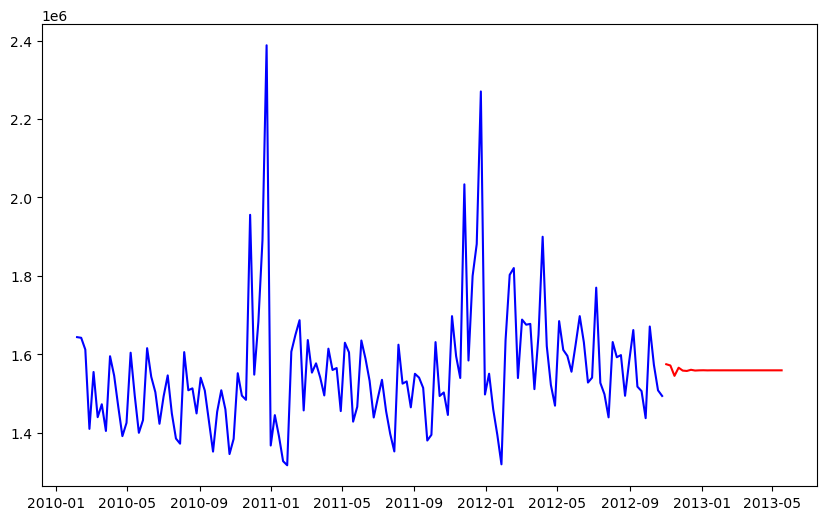

In [60]:
plt.figure(figsize=(10,6))
plt.plot(dl["Weekly_Sales"],color="blue")
plt.plot(forecast,color='red')

In [61]:
auto_Ar_MSE=mean_squared_error(test_data,forecast)

In [62]:
auto_Ar_RMSE=np.sqrt(auto_Ar_MSE)

In [64]:
print(auto_Ar_MSE)
print(auto_Ar_RMSE)

6356484867.231916
79727.56654527916


# Now  for Applying Arima Model we need the p,d and q values 
# now from the auto arima we found out that p d q order should be (2,1,3)
# But the resluts are bad witg those parameters  p ,d ,q values (5,0,4) chosen
# it may look the data is staic but it may not be fully satic sice model is making it static and the auto arima results 

In [156]:
train_data.head()

date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [157]:
train_data.tail()

date
2012-03-09    1675431.16
2012-03-16    1677472.78
2012-03-23    1511068.07
2012-03-30    1649604.63
2012-04-06    1899676.88
Name: Weekly_Sales, dtype: float64

In [158]:
test_data.head()

date
2012-04-13    1621031.70
2012-04-20    1521577.87
2012-04-27    1468928.37
2012-05-04    1684519.99
2012-05-11    1611096.05
Name: Weekly_Sales, dtype: float64

In [159]:
test_data.tail()

date
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74
Name: Weekly_Sales, dtype: float64

In [67]:
from statsmodels.tsa.arima.model import ARIMA

In [128]:
model_arima=ARIMA(train_data,order=(5,0,4))

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [129]:
model_arima_fit=model_arima.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -1515.143
Date:                Sat, 28 Oct 2023   AIC                           3052.285
Time:                        13:58:52   BIC                           3082.384
Sample:                    02-05-2010   HQIC                          3064.501
                         - 04-06-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.551e+06      4e+04     38.780      0.000    1.47e+06    1.63e+06
ar.L1         -0.8553      0.365     -2.346      0.019      -1.570      -0.141
ar.L2         -0.7940      0.409     -1.939      0.052      -1.596       0.008
ar.L3         -0.2835      0.308     -0.919      0.358      -0.888       0.321
ar.L4          0.0368      0.202      0.182      0.855      -0.359       0.432
ar.L5          0.2395      0.129      1.853      0.064      -0.014       0.493
ma.L1          1.3061      0.380      3.439      0.001       0.562       2.050
ma.L2          1.3976      0.524      2.666      0.008       0.370       2.425
ma.L3          0.7918      0.444      1.784      0.074      -0.078       1.662
ma.L4          0.6355      0.244      2.606      0.009       0.158       1.113
sigma2      2.334e+10      0.099   2.36e+11      0.000    2.33e+10    2.33e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.26
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.85   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.82e+28. Standard errors may be unstable.
"""

In [131]:
predictions=model_arima_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,typ="levels")

In [132]:
pred=(predictions.round(2))

In [133]:
pred   # this the predictions of Store 1 

2012-04-13    1681988.82
2012-04-20    1574856.24
2012-04-27    1573644.27
2012-05-04    1684813.95
2012-05-11    1500370.87
2012-05-18    1514128.59
2012-05-25    1591585.58
2012-06-01    1570496.91
2012-06-08    1542977.88
2012-06-15    1517630.44
2012-06-22    1573283.54
2012-06-29    1571384.63
2012-07-06    1529943.64
2012-07-13    1543596.72
2012-07-20    1561336.40
2012-07-27    1560330.80
2012-08-03    1541256.25
2012-08-10    1543917.24
2012-08-17    1560993.81
2012-08-24    1553894.18
2012-08-31    1544711.42
2012-09-07    1548890.93
2012-09-14    1555885.15
2012-09-21    1553016.47
2012-09-28    1546693.77
2012-10-05    1550351.02
2012-10-12    1554314.52
2012-10-19    1551382.73
2012-10-26    1548786.99
Freq: W-FRI, Name: predicted_mean, dtype: float64

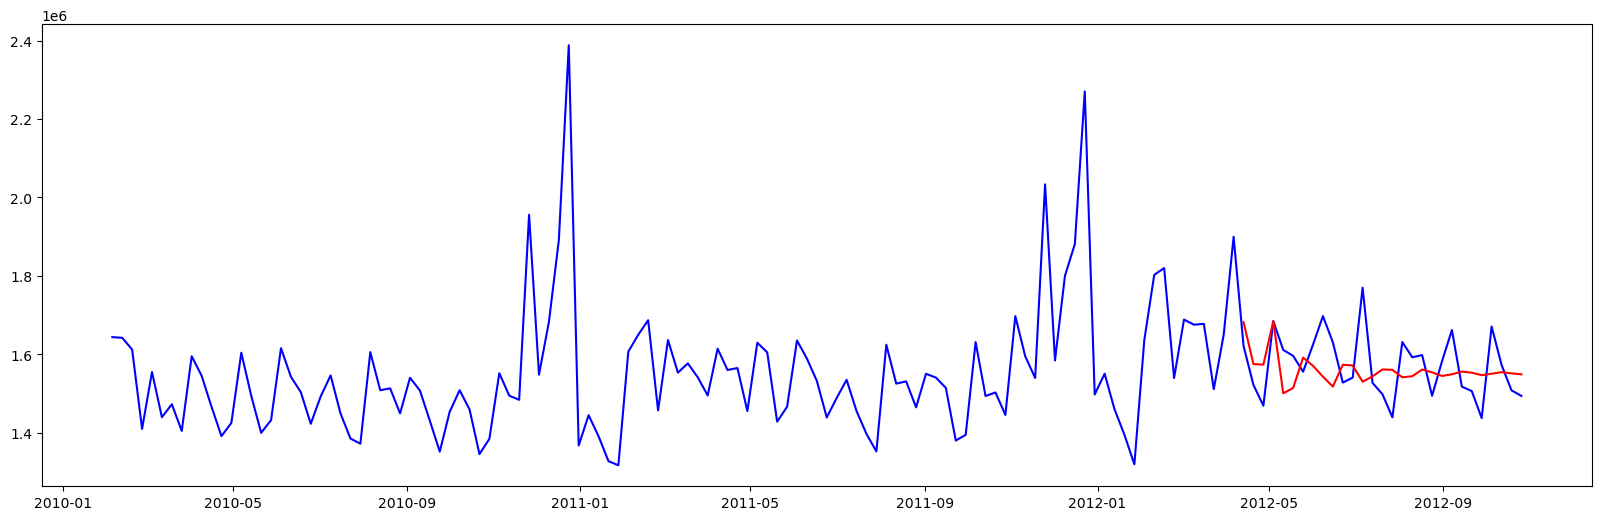

In [134]:
plt.figure(figsize=(20,6))
plt.plot(dl["Weekly_Sales"],linestyle="-",color="blue")
plt.plot(pred,linestyle="-",color="red")

In [135]:
from sklearn.metrics import *

In [136]:
arima_mse=mean_squared_error(test_data,pred)

In [137]:
print(arima_mse)

7647490411.4298725


In [138]:
arima_rmse=np.sqrt(arima_mse)

In [139]:
print(arima_rmse)

87449.93088293365


In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [141]:
model_sarimax=SARIMAX(train_data,order=(5,0,4),seasonal_order=(5,0,4,52))

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [142]:
model_sarimax_fit=model_sarimax.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

In [143]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(5, 0, 4)x(5, 0, 4, 52)   Log Likelihood               -1509.426
Date:                            Sat, 28 Oct 2023   AIC                           3056.851
Time:                                    14:22:38   BIC                           3108.839
Sample:                                02-05-2010   HQIC                          3077.950
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7382      1.980     -0.373      0.709      -4.618       3.142
ar.L2          0.5215      0.700      0.745      0.456      -0.850       1.893
ar.L3          0.8350      1.027      0.813      0.416      -1.178       2.848
ar.L4          0.4175      0.812      0.514      0.607      -1.174       2.009
ar.L5         -0.0371      0.539     -0.069      0.945      -1.094       1.020
ma.L1          1.1663      2.097      0.556      0.578      -2.943       5.276
ma.L2         -0.0374      1.192     -0.031      0.975      -2.374       2.299
ma.L3         -1.0152      1.030     -0.986      0.324      -3.034       1.004
ma.L4         -0.6629      1.378     -0.481      0.630      -3.364       2.038
ar.S.L52       0.2616   3357.776   7.79e-05      1.000   -6580.858    6581.381
ar.S.L104      0.0468   1893.887   2.47e-05      1.000   -3711.903    3711.997
ar.S.L156      0.0507    854.989   5.93e-05      1.000   -1675.696    1675.798
ar.S.L208      0.0604   2657.058   2.27e-05      1.000   -5207.677    5207.798
ar.S.L260     -0.0217   2238.340  -9.72e-06      1.000   -4387.087    4387.043
ma.S.L52       0.3015   3355.584   8.98e-05      1.000   -6576.522    6577.125
ma.S.L104      0.1335   1229.122      0.000      1.000   -2408.901    2409.168
ma.S.L156      0.0284   1736.344   1.63e-05      1.000   -3403.143    3403.200
ma.S.L208     -0.0418   1608.342   -2.6e-05      1.000   -3152.334    3152.251
sigma2      2.554e+10      0.000   8.27e+13      0.000    2.55e+10    2.55e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               121.34
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                             1.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.73e+31. Standard errors may be unstable.
"""

In [144]:
prediction=model_sarimax_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,typ="levels").round(2)

In [145]:
prediction

2012-04-13    1747119.60
2012-04-20    1634937.43
2012-04-27    1567046.38
2012-05-04    1718205.41
2012-05-11    1660369.48
2012-05-18    1569395.65
2012-05-25    1605820.63
2012-06-01    1683046.51
2012-06-08    1666978.39
2012-06-15    1634006.51
2012-06-22    1575583.57
2012-06-29    1607820.48
2012-07-06    1634184.25
2012-07-13    1585451.02
2012-07-20    1554603.85
2012-07-27    1527242.96
2012-08-03    1683539.43
2012-08-10    1626314.18
2012-08-17    1629392.16
2012-08-24    1590782.66
2012-08-31    1640452.31
2012-09-07    1633671.51
2012-09-14    1618327.53
2012-09-21    1541238.65
2012-09-28    1550643.00
2012-10-05    1683923.08
2012-10-12    1606007.13
2012-10-19    1609273.79
2012-10-26    1577484.68
Freq: W-FRI, Name: predicted_mean, dtype: float64

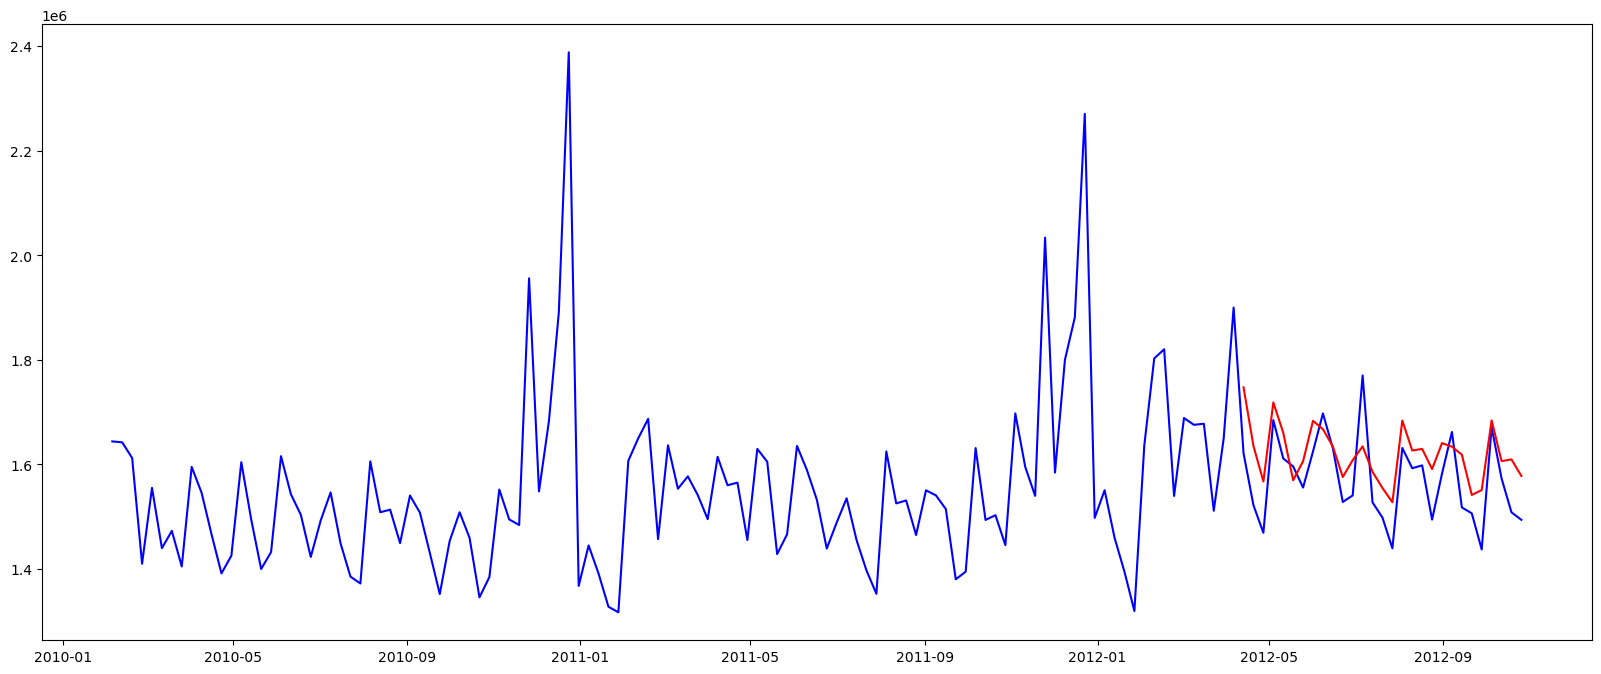

In [146]:
plt.figure(figsize=(20,8))
plt.plot(dl['Weekly_Sales'],linestyle="-",color="blue")
plt.plot(prediction,linestyle="-",color="red")

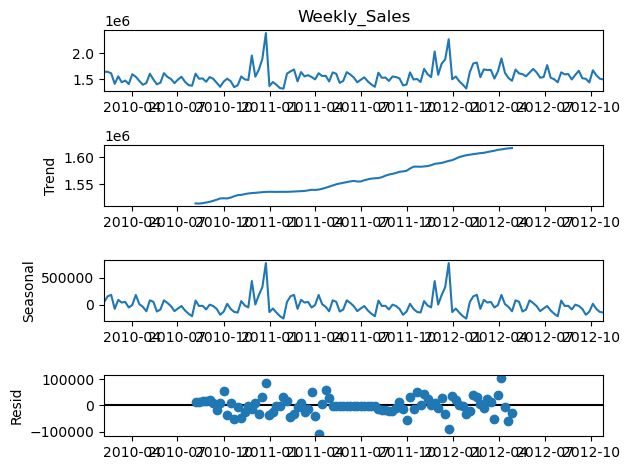

In [147]:
seasonal_decompose(dl["Weekly_Sales"],model="additive").plot();


In [148]:
model_holt_store1=ExponentialSmoothing(train_data,seasonal="add",seasonal_periods=52,trend='add')

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [149]:
model_holt_store1_fit=model_holt_store1.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [150]:
pred_hw_store1=model_holt_store1_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1).round(2)

In [151]:
pred_hw_store1

2012-04-13    1661418.55
2012-04-20    1659383.52
2012-04-27    1562989.67
2012-05-04    1736942.04
2012-05-11    1703654.32
2012-05-18    1534746.25
2012-05-25    1571845.56
2012-06-01    1742140.11
2012-06-08    1693187.12
2012-06-15    1638100.92
2012-06-22    1547819.23
2012-06-29    1600040.00
2012-07-06    1645861.21
2012-07-13    1563868.45
2012-07-20    1504942.19
2012-07-27    1463410.57
2012-08-03    1755300.81
2012-08-10    1659683.58
2012-08-17    1665555.49
2012-08-24    1601996.14
2012-08-31    1692986.06
2012-09-07    1662552.58
2012-09-14    1590005.53
2012-09-21    1504661.50
2012-09-28    1598581.63
2012-10-05    1673875.31
2012-10-12    1615143.98
2012-10-19    1512443.65
2012-10-26    1539925.75
Freq: W-FRI, dtype: float64

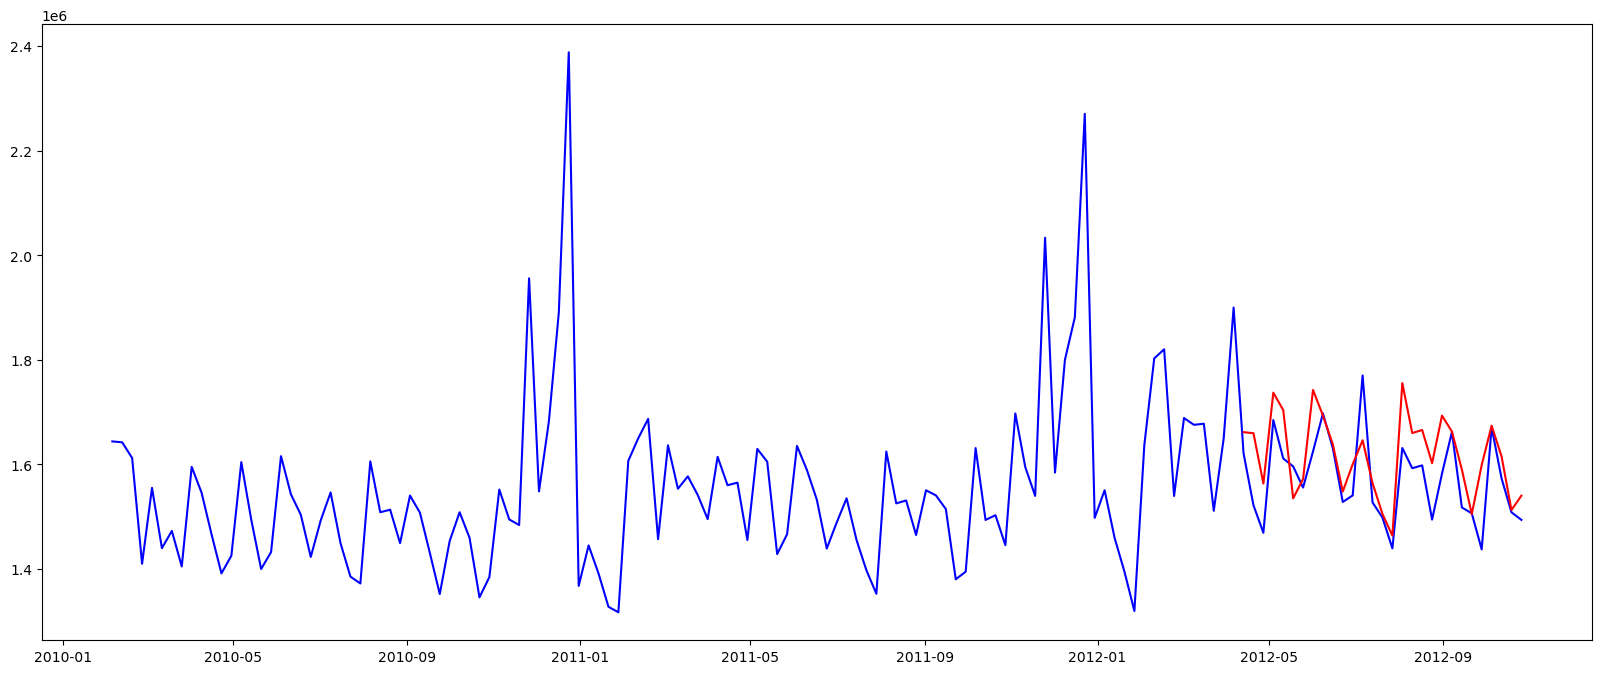

In [152]:
plt.figure(figsize=(20,8))
plt.plot(dl['Weekly_Sales'],linestyle="-",color="blue")
plt.plot(pred_hw_store1,linestyle="-",color="red")

In [153]:
HW_MSE=mean_squared_error(test_data,pred_hw_store1)

In [154]:
HW_RMSE=np.sqrt(HW_MSE)

In [101]:
print(HW_MSE)
print(HW_RMSE)

5648063463.546421
75153.59913900612


In [103]:
Sarimax_MSE=mean_squared_error(test_data,prediction)

In [104]:
print(Sarimax_MSE)

5186982364.752444


In [105]:
sarimax_RMSE=np.sqrt(Sarimax_MSE)

In [106]:
print(sarimax_RMSE)

72020.70788844305


In [110]:
data= { 
    'Model':["Auto_Arima","ARIMA" , "SARIMAX","HoltWinters"],
    'MSE':[auto_Ar_MSE,arima_mse,Sarimax_MSE,HW_MSE],
    'RMSE':[auto_Ar_RMSE,arima_rmse,sarimax_RMSE,HW_RMSE]
    
}

result=pd.DataFrame(data)
result.set_index("Model")

,MSE,RMSE
Model,,
Auto_Arima,6.356485e+09,79727.566545
ARIMA,6.531520e+09,80817.817822
SARIMAX,5.186982e+09,72020.707888
HoltWinters,5.648063e+09,75153.599139


In [1]:
#From the Above analysis it is seen that SArima and Holt winters giving better resluts than arima and auto _arima

# Here it is seen that Holt WZinters model is suitable for this dataset compared to sarima and arima as its error valued are less than them.

# The Highest Performing stores are according to the historical data are Store no-4,20,14,2,10
#the lowest performing stores are according to the historical data are store no-33,5,44,3,36,38
#the worst performing store is store no-33

# Store NO-4

In [26]:
dy=df[df["Store"]==4]

In [27]:
dy.shape

(143, 12)

In [28]:
dy=dy[["date","Weekly_Sales"]]

In [29]:
dy=dy.set_index(dy["date"])

In [30]:
dy.drop("date",axis=1,inplace=True)

In [31]:
dy

,Weekly_Sales
date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
...,...
2012-09-28,2027620.23
2012-10-05,2209835.43
2012-10-12,2133026.07


In [32]:
def adf_test1(series):
    result=adfuller(series)
    pval = result[1]
    print(pval)
    
    if pval < 0.05:
        print("The Data is Static")
    else:
        print("The Data is Not Static")

In [33]:
adf_test1(dy["Weekly_Sales"])

0.04779866223669852
The Data is Static


In [34]:
train_size = int(0.8 * len(dy["Weekly_Sales"]))
train_data =dy["Weekly_Sales"][:train_size]
test_data = dy["Weekly_Sales"][train_size:]

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


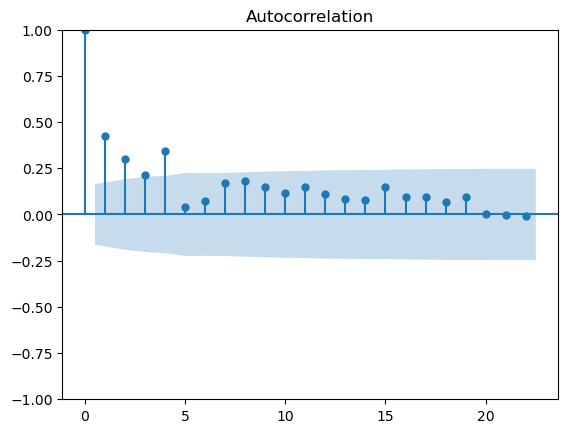

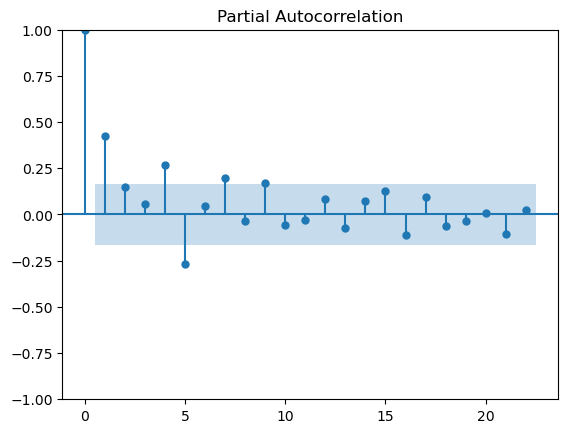

In [35]:
acf=plot_acf(dy["Weekly_Sales"])
pacf=plot_pacf(dy["Weekly_Sales"])

In [48]:
model_sarimax_store4=SARIMAX(train_data,order=(1,0,4),seasonal_order=(1,0,4,52))

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [49]:
model_sarimax_store4_fit=model_sarimax_store4.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [50]:
model_sarimax_store4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(1, 0, 4)x(1, 0, 4, 52)   Log Likelihood               -1572.078
Date:                            Thu, 02 Nov 2023   AIC                           3166.155
Time:                                    20:46:39   BIC                           3196.253
Sample:                                02-05-2010   HQIC                          3178.370
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.072     13.972      0.000       0.859       1.140
ma.L1         -0.5017      0.323     -1.552      0.121      -1.135       0.132
ma.L2         -0.2893      0.272     -1.065      0.287      -0.821       0.243
ma.L3         -0.3125      0.206     -1.515      0.130      -0.717       0.092
ma.L4          0.2223      0.180      1.232      0.218      -0.131       0.576
ar.S.L52       0.4922   1.26e+04    3.9e-05      1.000   -2.47e+04    2.47e+04
ma.S.L52       0.0727   1.25e+04    5.8e-06      1.000   -2.46e+04    2.46e+04
ma.S.L104      0.0292   1.28e+04   2.28e-06      1.000   -2.51e+04    2.51e+04
ma.S.L156      0.0138   1.43e+04   9.61e-07      1.000   -2.81e+04    2.81e+04
ma.S.L208      0.0055   1.59e+04   3.45e-07      1.000   -3.11e+04    3.11e+04
sigma2      8.183e+10      0.004   2.21e+13      0.000    8.18e+10    8.18e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):               287.17
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+30. Standard errors may be unstable.
"""

In [51]:
pred4=model_sarimax_store4_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,typ="levels").round(2)

In [52]:
pred4

2012-04-13    2287257.54
2012-04-20    2354904.38
2012-04-27    2081742.90
2012-05-04    2238479.84
2012-05-11    2205125.72
2012-05-18    2211750.34
2012-05-25    2195582.98
2012-06-01    2239017.74
2012-06-08    2243874.01
2012-06-15    2280614.13
2012-06-22    2206251.80
2012-06-29    2229730.93
2012-07-06    2238730.21
2012-07-13    2227204.52
2012-07-20    2220216.55
2012-07-27    2194188.06
2012-08-03    2288477.78
2012-08-10    2255922.82
2012-08-17    2327505.79
2012-08-24    2191035.38
2012-08-31    2240193.54
2012-09-07    2249043.35
2012-09-14    2238205.43
2012-09-21    2214047.81
2012-09-28    2155572.08
2012-10-05    2287678.86
2012-10-12    2236318.32
2012-10-19    2310301.21
2012-10-26    2278093.36
Freq: W-FRI, Name: predicted_mean, dtype: float64

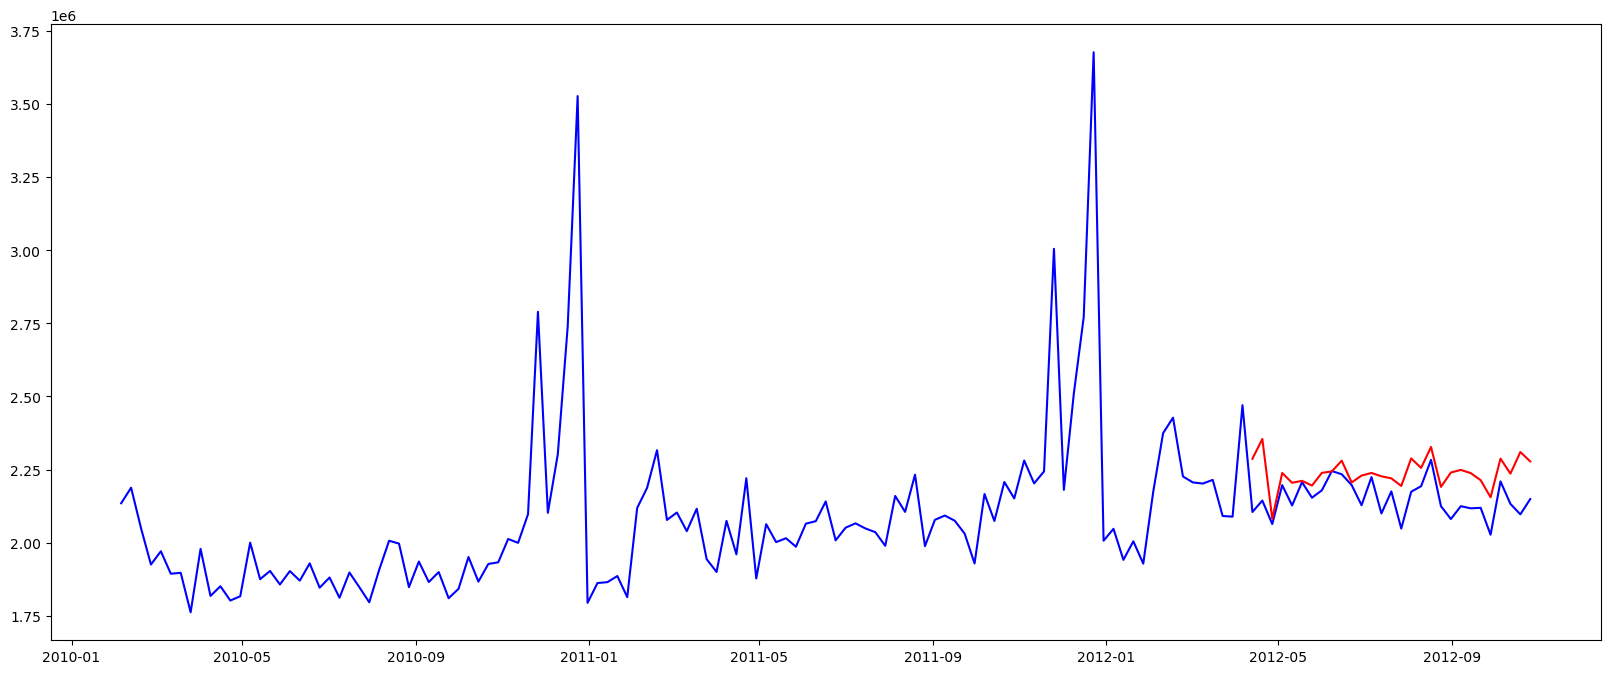

In [53]:
plt.figure(figsize=(20,8))
plt.plot(dy['Weekly_Sales'],linestyle="-",color="blue")
plt.plot(pred4,linestyle="-",color="red")

In [54]:
sarimax_MSE_store4=mean_squared_error(test_data,pred4)

In [55]:
sarimax_MSE_store4

11208200359.578316

In [56]:
sarimax_RMSE_store4=np.sqrt(sarimax_MSE_store4)

In [57]:
sarimax_RMSE_store4

105868.78841083578

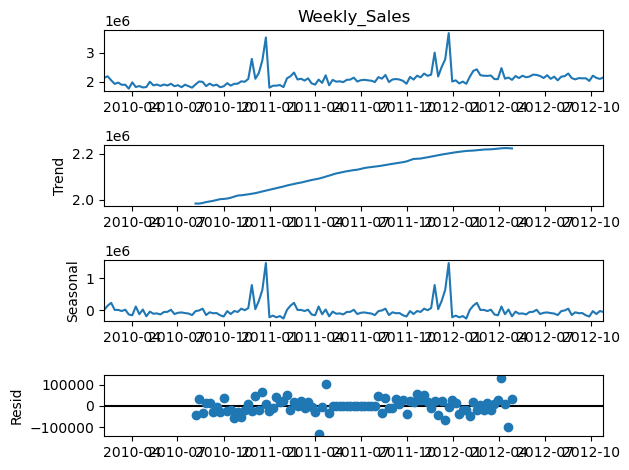

In [58]:
seasonal_decompose(dy["Weekly_Sales"],model="additive").plot();

In [76]:
model_holt_store4=ExponentialSmoothing(train_data,seasonal="add",seasonal_periods=52,trend='add')

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [77]:
model_holt_store4_fit=model_holt_store4.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
pred_hw_store4=model_holt_store4_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1).round(2)

In [79]:
pred_hw_store4

2012-04-13    2126146.93
2012-04-20    2384184.27
2012-04-27    2039738.36
2012-05-04    2223316.47
2012-05-11    2160197.90
2012-05-18    2172781.98
2012-05-25    2143080.71
2012-06-01    2221773.34
2012-06-08    2230344.99
2012-06-15    2298058.48
2012-06-22    2166198.64
2012-06-29    2208647.64
2012-07-06    2222566.49
2012-07-13    2205309.82
2012-07-20    2193357.27
2012-07-27    2147298.37
2012-08-03    2230105.02
2012-08-10    2332399.98
2012-08-17    2322726.42
2012-08-24    2172651.28
2012-08-31    2260108.38
2012-09-07    2190149.28
2012-09-14    2223518.14
2012-09-21    2133136.24
2012-09-28    2167012.44
2012-10-05    2276734.18
2012-10-12    2191809.15
2012-10-19    2249755.24
2012-10-26    2253608.14
Freq: W-FRI, dtype: float64

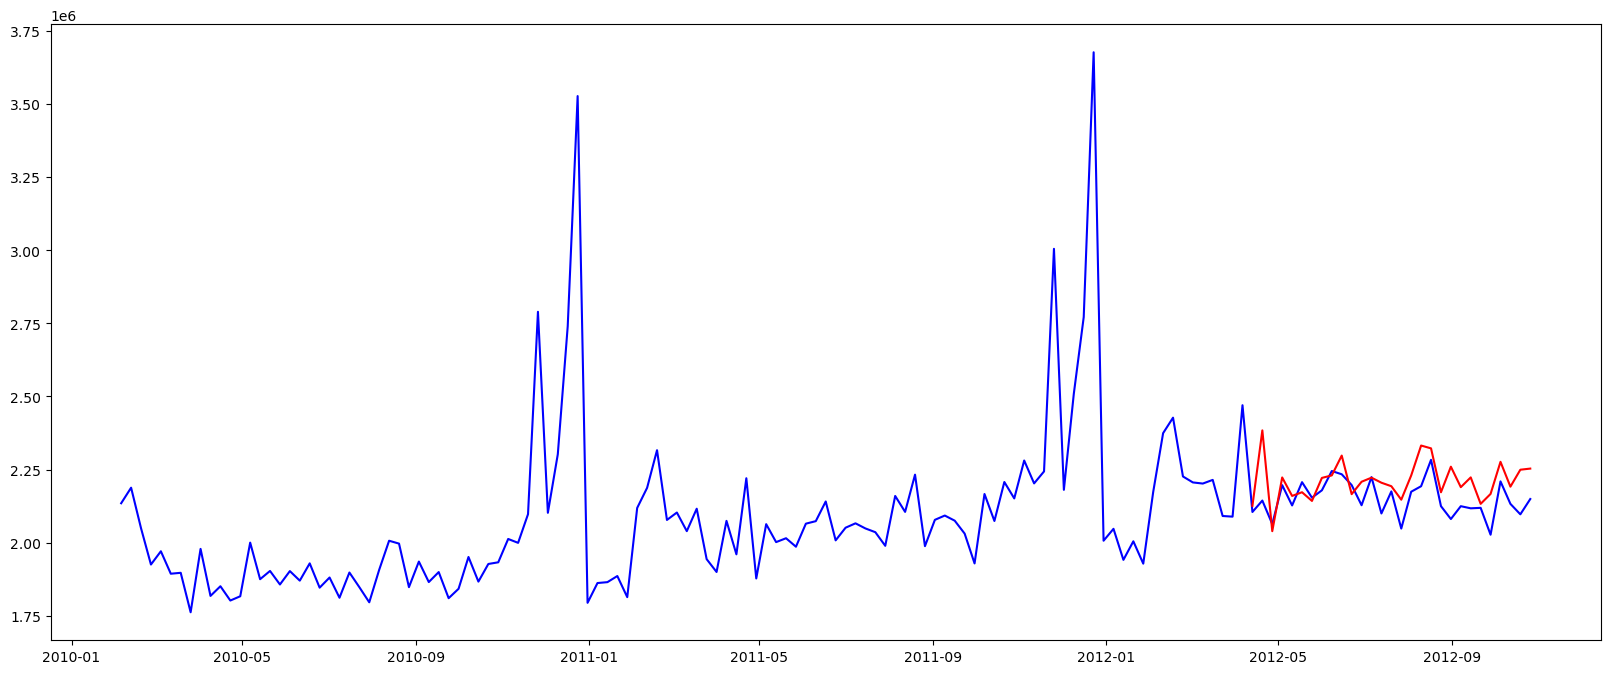

In [80]:
plt.figure(figsize=(20,8))
plt.plot(dy['Weekly_Sales'],linestyle="-",color="blue")
plt.plot(pred_hw_store4,linestyle="-",color="red")

In [81]:
Holtwinter_MSE_store4=mean_squared_error(test_data,pred_hw_store4)

In [82]:
Holtwinter_MSE_store4

7981287125.768183

In [83]:
Holtwinter_RMSE_store4=Holtwinter_MSE_store4**0.5

In [75]:
Holtwinter_RMSE_store4

99457.042036635

# Store NO- 20

In [99]:
dz=df[df["Store"]==20]


In [100]:
dz=dz[["date","Weekly_Sales"]]

In [101]:
dz=dz.set_index(dz["date"])
dz.drop("date",axis=1,inplace=True)

In [102]:
def adf_test1(series):
    result=adfuller(series)
    pval = result[1]
    print(pval)
    
    if pval < 0.05:
        print("The Data is Static")
    else:
        print("The Data is Not Static")

In [103]:
adf_test1(dz["Weekly_Sales"])

3.4912952838128635e-06
The Data is Static


In [104]:
train_size = int(0.8 * len(dz["Weekly_Sales"]))
train_data =dz["Weekly_Sales"][:train_size]
test_data = dz["Weekly_Sales"][train_size:]

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


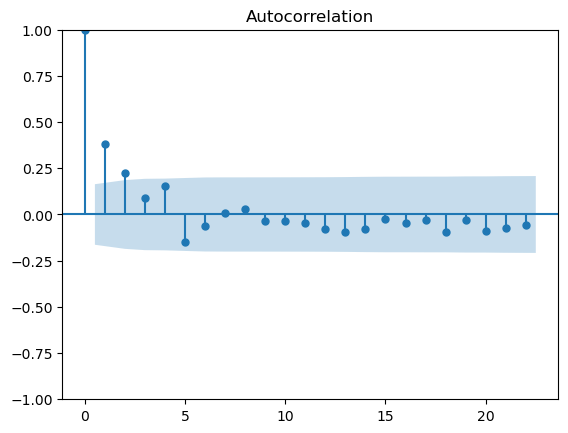

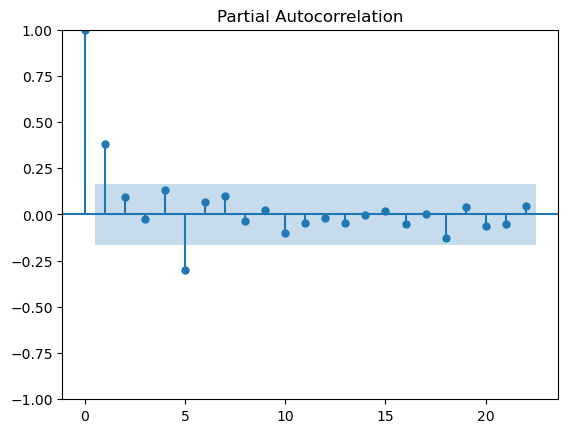

In [105]:
acf=plot_acf(dz["Weekly_Sales"])
pacf=plot_pacf(dz["Weekly_Sales"])

In [106]:
model_sarimax_store20=SARIMAX(train_data,order=(5,0,2),seasonal_order=(5,0,2,52))

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [107]:
model_sarimax_store20_fit=model_sarimax_store20.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [108]:
model_sarimax_store20_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(5, 0, 2)x(5, 0, 2, 52)   Log Likelihood               -1579.482
Date:                            Fri, 03 Nov 2023   AIC                           3188.964
Time:                                    22:19:15   BIC                           3230.007
Sample:                                02-05-2010   HQIC                          3205.621
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5701      2.055     -0.277      0.782      -4.599       3.459
ar.L2          0.3284      0.595      0.552      0.581      -0.838       1.495
ar.L3          0.5586      1.072      0.521      0.602      -1.543       2.660
ar.L4          0.4757      0.402      1.184      0.236      -0.312       1.263
ar.L5          0.1642      0.701      0.234      0.815      -1.209       1.537
ma.L1          1.1307      2.103      0.538      0.591      -2.992       5.253
ma.L2          0.5083      1.256      0.405      0.686      -1.953       2.970
ar.S.L52       0.2902   1.14e+04   2.55e-05      1.000   -2.23e+04    2.23e+04
ar.S.L104      0.0613   3864.679   1.59e-05      1.000   -7574.570    7574.692
ar.S.L156      0.0600   8547.829   7.01e-06      1.000   -1.68e+04    1.68e+04
ar.S.L208      0.0024   7215.964   3.38e-07      1.000   -1.41e+04    1.41e+04
ar.S.L260      0.0046   4329.127   1.06e-06      1.000   -8484.928    8484.937
ma.S.L52       0.3165   1.15e+04   2.76e-05      1.000   -2.25e+04    2.25e+04
ma.S.L104      0.1038   4593.494   2.26e-05      1.000   -9002.979    9003.187
sigma2      8.266e+10      0.003   2.56e+13      0.000    8.27e+10    8.27e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               264.30
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.73
Prob(H) (two-sided):                  0.23   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.27e+29. Standard errors may be unstable.
"""

In [97]:
pred20=model_sarimax_store20_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,typ="levels").round(2)

NameError: name 'model_sarimax_store20_fit' is not defined

In [98]:
pred20

NameError: name 'pred20' is not defined

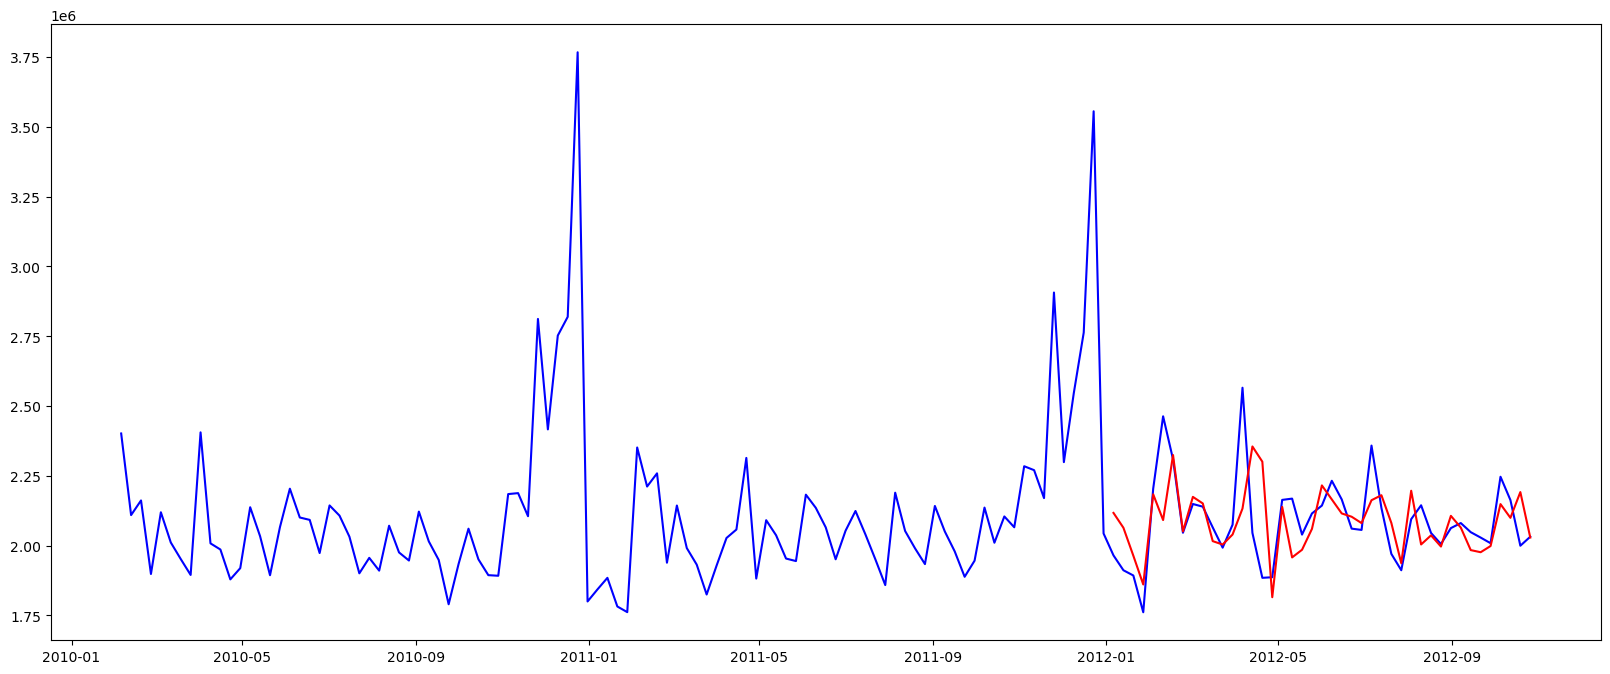

In [93]:
plt.figure(figsize=(20,8))
plt.plot(dz['Weekly_Sales'],linestyle="-",color="blue")
plt.plot(pred20,linestyle="-",color="red")

In [96]:
sarimax_MSE_store20=mean_squared_error(test_data,pred20)

NameError: name 'pred20' is not defined

In [95]:
sarimax_MSE_store20

20338136203.61297

In [96]:
sarimax_RMSE_store20=np.sqrt(sarimax_MSE_store20)

In [97]:
sarimax_RMSE_store20

142611.83752975406

# Store No -14

In [29]:
dg=df[df["Store"]==14]

In [30]:
dg.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,date
1859,14,05-02-2010,2623469.95,0,27.31,2.784,181.871190,8.992,2010,02,05,2010-02-05
1860,14,12-02-2010,1704218.84,1,27.73,2.773,181.982317,8.992,2010,02,12,2010-02-12
1861,14,19-02-2010,2204556.70,0,31.27,2.745,182.034782,8.992,2010,02,19,2010-02-19
1862,14,26-02-2010,2095591.63,0,34.89,2.754,182.077469,8.992,2010,02,26,2010-02-26
1863,14,05-03-2010,2237544.75,0,37.13,2.777,182.120157,8.992,2010,03,05,2010-03-05


In [31]:
dg=dg[["date","Weekly_Sales"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x2108eafff10>,
 'caps': [<matplotlib.lines.Line2D at 0x2108eb30490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2108eaffcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2108eb309d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2108eb30c70>],
 'means': []}

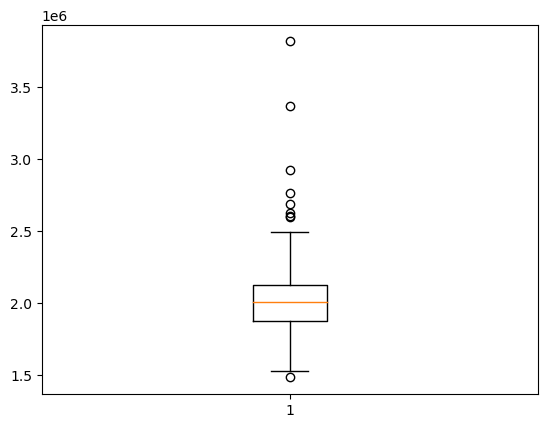

In [32]:
plt.boxplot(dg["Weekly_Sales"])

In [33]:
dg.head()

,date,Weekly_Sales
1859,2010-02-05,2623469.95
1860,2010-02-12,1704218.84
1861,2010-02-19,2204556.70
1862,2010-02-26,2095591.63
1863,2010-03-05,2237544.75


In [34]:
dg=dg.set_index(dg["date"])
dg.drop("date",axis=1,inplace=True)

In [35]:
dg

,Weekly_Sales
date,
2010-02-05,2623469.95
2010-02-12,1704218.84
2010-02-19,2204556.70
2010-02-26,2095591.63
2010-03-05,2237544.75
...,...
2012-09-28,1522512.20
2012-10-05,1687592.16
2012-10-12,1639585.61


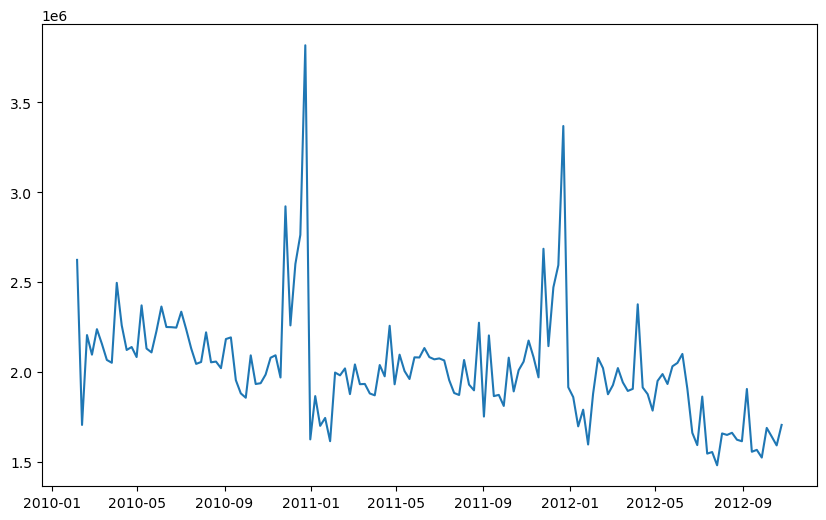

In [36]:
plt.figure(figsize=(10,6))
plt.plot(dg["Weekly_Sales"])

In [38]:
dg.head()

,Weekly_Sales
date,
2010-02-05,2623469.95
2010-02-12,1704218.84
2010-02-19,2204556.70
2010-02-26,2095591.63
2010-03-05,2237544.75


In [109]:
train_size = int(0.8 * len(dg["Weekly_Sales"]))
train_data =dg["Weekly_Sales"][:train_size]
test_data = dg["Weekly_Sales"][train_size:]

In [110]:
adf_test(dg["Weekly_Sales"])

0.07093531756108433
The Data is Not Static


In [111]:
dg["diff"]=dg["Weekly_Sales"].diff(1)

In [112]:
dg.dropna(inplace=True)

In [113]:
dg.head()

,Weekly_Sales,diff
date,,
2010-02-26,2095591.63,-108965.07
2010-03-05,2237544.75,141953.12
2010-03-12,2156035.06,-81509.69
2010-03-19,2066219.30,-89815.76
2010-03-26,2050396.27,-15823.03


In [114]:
adf_test(dg["diff"])

3.4353797374995905e-11
The Data is Static


C:\Users\samad\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


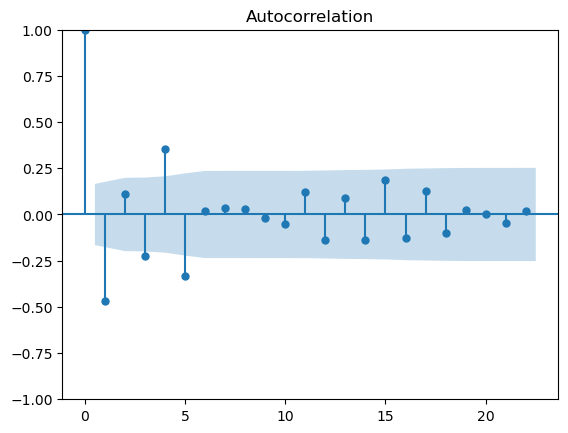

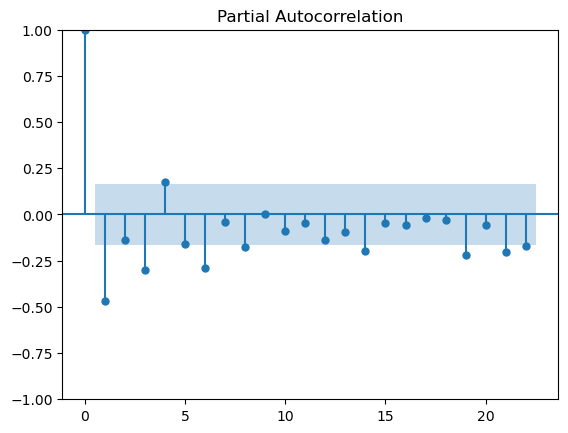

In [115]:
acf14=plot_acf(dg["diff"])
pacf14=plot_pacf(dg["diff"])

In [82]:
model_sarimax_store14=SARIMAX(train_data,order=(1,1,5),seasonal_order=(3,1,5,12))

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [83]:
model_sarimax_store14_fit=model_sarimax_store14.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\samad\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
model_sarimax_store14_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  113
Model:             SARIMAX(1, 1, 5)x(3, 1, 5, 12)   Log Likelihood               -1428.000
Date:                            Fri, 03 Nov 2023   AIC                           2886.000
Time:                                    22:19:41   BIC                           2925.077
Sample:                                02-12-2010   HQIC                          2901.815
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3276      0.602     -0.544      0.586      -1.508       0.853
ma.L1         -0.0150      0.650     -0.023      0.982      -1.288       1.258
ma.L2          0.0118      0.287      0.041      0.967      -0.550       0.574
ma.L3         -0.1742      0.243     -0.716      0.474      -0.651       0.302
ma.L4          0.1985      0.295      0.673      0.501      -0.380       0.777
ma.L5         -0.3028      0.345     -0.877      0.380      -0.980       0.374
ar.S.L12      -1.2072      9.116     -0.132      0.895     -19.073      16.659
ar.S.L24      -0.7490      7.619     -0.098      0.922     -15.682      14.184
ar.S.L36      -0.4980      2.761     -0.180      0.857      -5.909       4.913
ma.S.L12       0.4388      9.442      0.046      0.963     -18.067      18.944
ma.S.L24      -0.0717     11.095     -0.006      0.995     -21.818      21.674
ma.S.L36      -0.0821      4.734     -0.017      0.986      -9.360       9.196
ma.S.L48      -0.3750      2.117     -0.177      0.859      -4.523       3.774
ma.S.L60       0.0836      1.424      0.059      0.953      -2.707       2.874
sigma2       2.42e+11   3.12e-09   7.76e+19      0.000    2.42e+11    2.42e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                53.14
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.54
Prob(H) (two-sided):                  0.85   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.96e+35. Standard errors may be unstable.
"""

In [117]:
pred14=model_sarimax_store14_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,typ="levels").round(2)

In [118]:
pred14

2012-04-06    1906408.08
2012-04-13    2225960.12
2012-04-20    2299807.28
2012-04-27    2257877.32
2012-05-04    2394482.46
2012-05-11    2422301.75
2012-05-18    2202382.38
2012-05-25    2268893.15
2012-06-01    2371223.19
2012-06-08    2570841.64
2012-06-15    2167301.03
2012-06-22    2108420.37
2012-06-29    2197235.95
2012-07-06    2220078.68
2012-07-13    2153382.57
2012-07-20    2233590.97
2012-07-27    2355034.88
2012-08-03    2325497.84
2012-08-10    2257004.88
2012-08-17    2249001.14
2012-08-24    2320582.44
2012-08-31    2384134.45
2012-09-07    2225728.05
2012-09-14    2164748.00
2012-09-21    2323758.99
2012-09-28    2380489.26
2012-10-05    2330499.36
2012-10-12    2358264.73
2012-10-19    2482644.18
Freq: W-FRI, Name: predicted_mean, dtype: float64

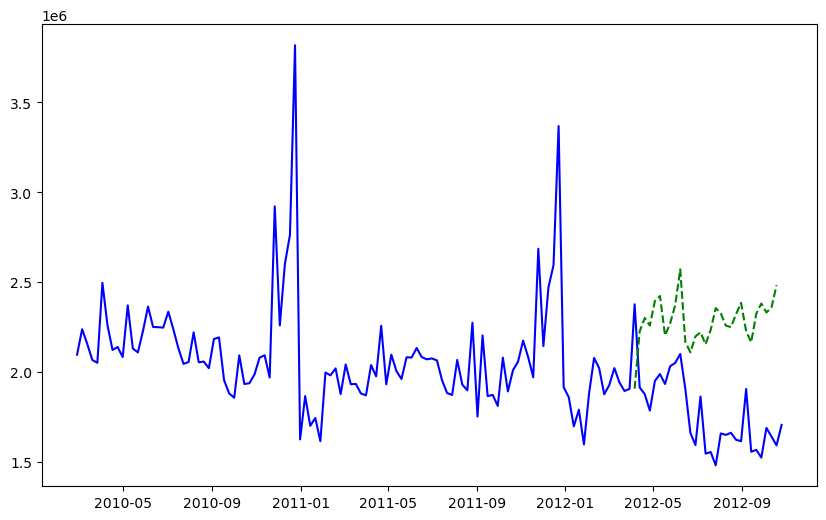

In [119]:
plt.figure(figsize=(10,6))
plt.plot(dg["Weekly_Sales"],linestyle='-',color="blue")
plt.plot(pred14,linestyle='--',color='green')

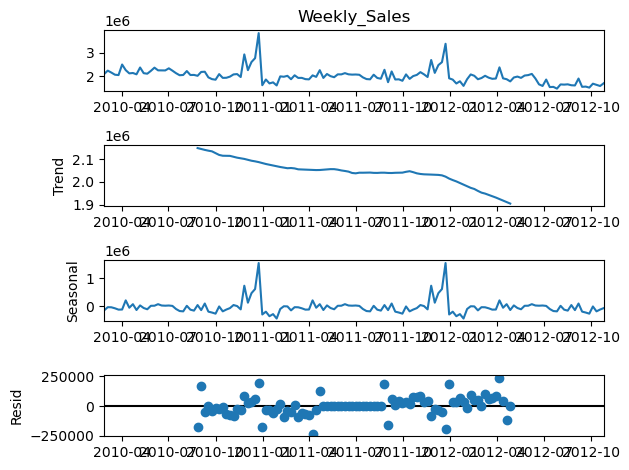

In [120]:
seasonal_decompose(dg["Weekly_Sales"],model="additive").plot();
#model_holt_store14=ExponentialSmoothing(dg["Weekly_Sales"],seasonal="mul",seasonal_periods=52,trend='add')


In [121]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [123]:
model_holt_store14=ExponentialSmoothing(train_data,seasonal="mul",seasonal_periods=52,trend='mul')

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [124]:
model_holt_store14_fit=model_holt_store14.fit()

C:\Users\samad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [125]:
model_holt_store14_fit.summary()

Dep. Variable:,Weekly_Sales,No. Observations:,112
Model:,ExponentialSmoothing,SSE,1291498027120.313
Optimized:,True,AIC,2706.852
Trend:,Multiplicative,BIC,2859.088
Seasonal:,Multiplicative,AICC,2835.984
Seasonal Periods:,52,Date:,"Fri, 03 Nov 2023"
Box-Cox:,False,Time:,22:20:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1110714,alpha,True
smoothing_trend,0.0123413,beta,True


In [126]:
pred_holt_store14=model_holt_store14_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1).round(2)

In [127]:
pred_holt_store14

2012-04-13    2011341.78
2012-04-20    2296336.86
2012-04-27    1962296.00
2012-05-04    2127092.51
2012-05-11    2032451.26
2012-05-18    1986409.01
2012-05-25    2109865.18
2012-06-01    2111328.00
2012-06-08    2165889.18
2012-06-15    2116482.96
2012-06-22    2108625.82
2012-06-29    2114238.40
2012-07-06    2098709.48
2012-07-13    1985903.24
2012-07-20    1911748.75
2012-07-27    1899179.65
2012-08-03    2097246.64
2012-08-10    1956989.64
2012-08-17    1976189.12
2012-08-24    1943268.84
2012-08-31    2101935.10
2012-09-07    2113617.34
2012-09-14    1885819.38
2012-09-21    1816170.13
2012-09-28    1798219.20
2012-10-05    2033490.22
2012-10-12    1880473.46
2012-10-19    1883977.12
2012-10-26    1929989.36
Freq: W-FRI, dtype: float64

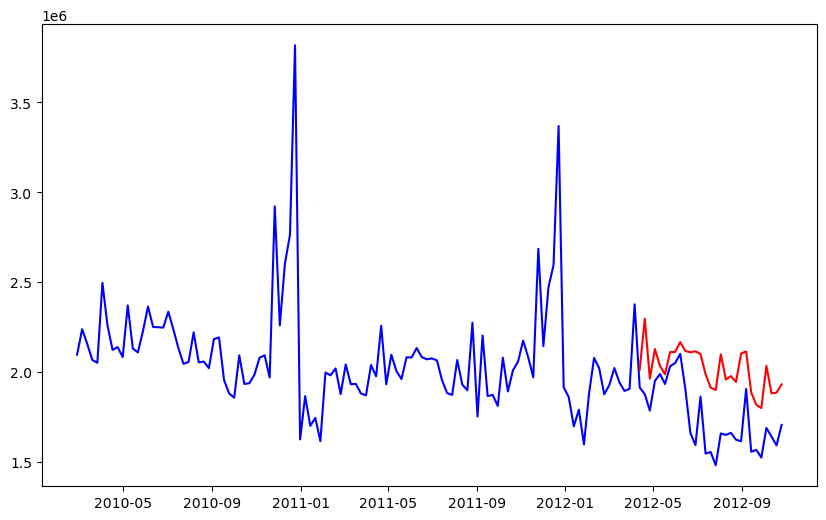

In [128]:
plt.figure(figsize=(10,6))
plt.plot(dg["Weekly_Sales"],linestyle="-",color="blue")
plt.plot(pred_holt_store14,linestyle="-",color="red")
plt.show()

In [129]:
sarimax_MSE_store14=mean_squared_error(test_data,pred14)

In [130]:
sarimax_MSE_store14

328776748040.60846

In [131]:
sarimax_RMSE_store14=sarimax_MSE_store14**0.5

In [132]:
sarimax_RMSE_store14

573390.5719844096

In [133]:
sarimax_HWMSE_store14=mean_squared_error(test_data,pred_holt_store14)

In [134]:
sarimax_HWMSE_store14

92453824560.25177

In [135]:
sarimax_HWRMSE_store14=sarimax_HWMSE_store14**0.5

In [136]:
sarimax_HWRMSE_store14

304062.2050835187